In [2]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['posteam', 'play_type', 'yards_gained', 'pass_attempt', 'rush_attempt', 'pass_touchdown', 'rush_touchdown']
data = pd.read_csv('reg_pbp_2009.csv', usecols = cols)
print(data.isna().sum())
cleaned_data = data.dropna()
cleaned_data.isna().sum()

posteam           1548
play_type         1512
yards_gained         0
rush_attempt      1512
pass_attempt      1512
pass_touchdown    1512
rush_touchdown    1512
dtype: int64


posteam           0
play_type         0
yards_gained      0
rush_attempt      0
pass_attempt      0
pass_touchdown    0
rush_touchdown    0
dtype: int64

In [3]:
# Get team names
teams = set()

for team in cleaned_data['posteam']:
    if len(teams) == 32:
        break

    if team != 'missing':
        teams.add(team)

list(teams)

['DAL',
 'TB',
 'SEA',
 'NO',
 'BAL',
 'STL',
 'NYJ',
 'NYG',
 'IND',
 'TEN',
 'JAC',
 'DEN',
 'MIN',
 'ARI',
 'CAR',
 'BUF',
 'KC',
 'GB',
 'CLE',
 'OAK',
 'CIN',
 'PHI',
 'WAS',
 'NE',
 'MIA',
 'CHI',
 'DET',
 'PIT',
 'SD',
 'ATL',
 'HOU',
 'SF']

In [ ]:
# Get team stats

def team_stats(season_data):
    cleaned_data['pass_yards'] = cleaned_data['yards_gained'] * cleaned_data['pass_attempt']
    cleaned_data['rush_yards'] = cleaned_data['yards_gained'] * cleaned_data['rush_attempt']
    cleaned_data['touchdown'] = cleaned_data['pass_touchdown'] + cleaned_data['rush_touchdown']

    stats = (cleaned_data.groupby('posteam', as_index = False)
            .agg(
                pass_yards = ('pass_yards', 'sum'),
                rush_yards = ('rush_yards', 'sum'),
                pass_touchdowns = ('pass_touchdown', 'sum'),
                rush_touchdowns = ('rush_touchdown', 'sum'),
                total_touchdowns = ('touchdown', 'sum')
                )
            )

    return stats
    

,posteam,pass_yards,rush_yards,pass_touchdowns,rush_touchdowns,total_touchdowns
0,ARI,4021.0,1489.0,28.0,15.0,43.0
1,ATL,3571.0,1876.0,26.0,15.0,41.0
2,BAL,3413.0,2206.0,21.0,22.0,43.0
3,BUF,2515.0,1867.0,17.0,6.0,23.0
4,CAR,2801.0,2500.0,16.0,18.0,34.0
5,CHI,3478.0,1491.0,27.0,6.0,33.0
6,CIN,2892.0,2058.0,21.0,9.0,30.0
7,CLE,2076.0,2089.0,11.0,10.0,21.0
8,DAL,4287.0,2103.0,26.0,14.0,40.0
9,DEN,3627.0,1836.0,21.0,9.0,30.0


| Question | Best plot |
|---|---|
| Are yards & TDs related? | Scatter / regplot |
| How does the league look overall? | Histogram / violin |
| Who’s best or worst? | Bar |
| How efficient are teams? | Scatter (rate)
| How do stats relate to each other? | Pairplot

   posteam   play_type   yards
0      ARI  pass_yards  4021.0
1      ATL  pass_yards  3571.0
2      BAL  pass_yards  3413.0
3      BUF  pass_yards  2515.0
4      CAR  pass_yards  2801.0
..     ...         ...     ...
59      SF  rush_yards  1600.0
60     STL  rush_yards  1792.0
61      TB  rush_yards  1628.0
62     TEN  rush_yards  2594.0
63     WAS  rush_yards  1508.0

[64 rows x 3 columns]


Text(0, 0.5, 'Team')

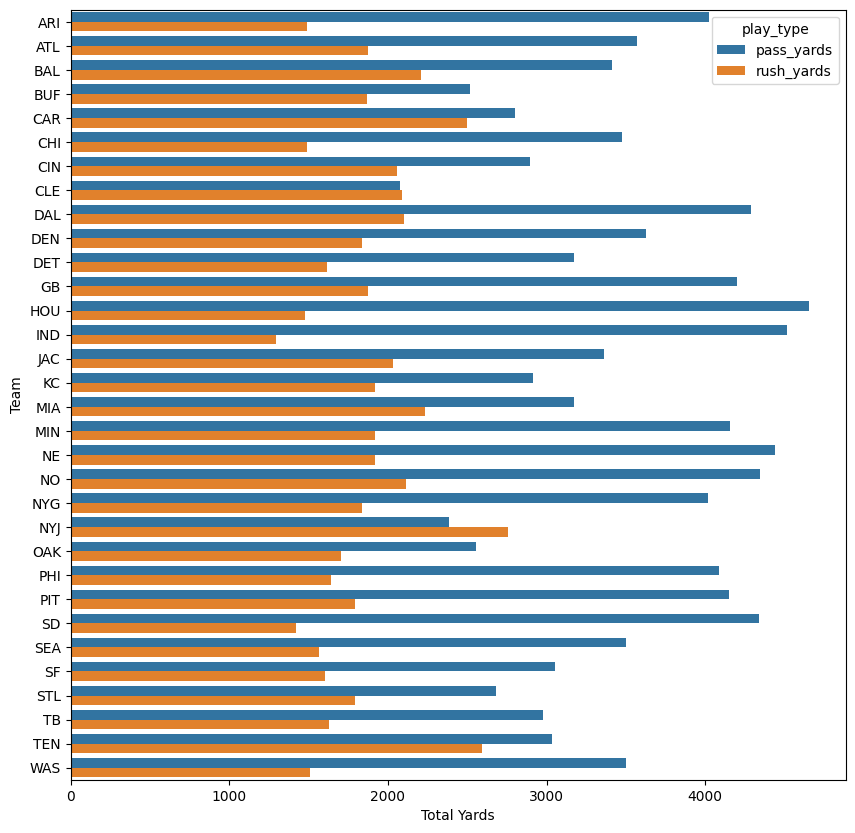

In [5]:
# Bar graph to display total yards for each team
melted_stats = stats[['posteam', 'pass_yards', 'rush_yards']].melt(id_vars = 'posteam', var_name = 'play_type', value_name = 'yards')
print(melted_stats)

fig, ax = plt.subplots(figsize = (10, 10))

sns.barplot(x = 'yards', y = 'posteam', data = melted_stats, hue = 'play_type')

ax.set_xlabel("Total Yards")
ax.set_ylabel("Team")


Text(0, 0.5, 'Team')

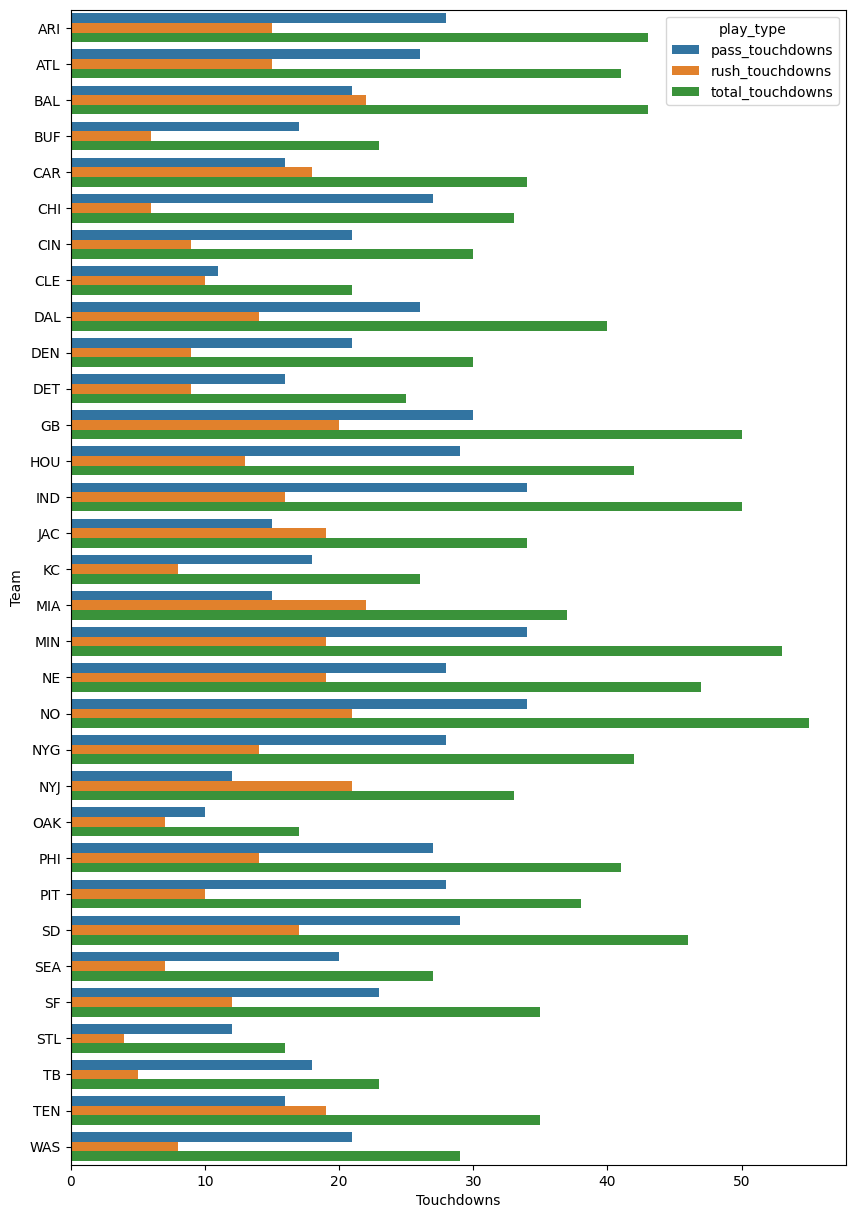

In [6]:
# Bar graph to dislplay total touchdowns for each team by type
melted_stats = stats[['posteam', 'pass_touchdowns', 'rush_touchdowns', 'total_touchdowns']].melt(id_vars = 'posteam', var_name = 'play_type', value_name = 'touchdowns')
melted_stats[1:]

fig, ax = plt.subplots(figsize = (10, 15))

sns.barplot(x = 'touchdowns', y = 'posteam', data = melted_stats, hue = 'play_type')

ax.set_xlabel("Touchdowns")
ax.set_ylabel("Team")

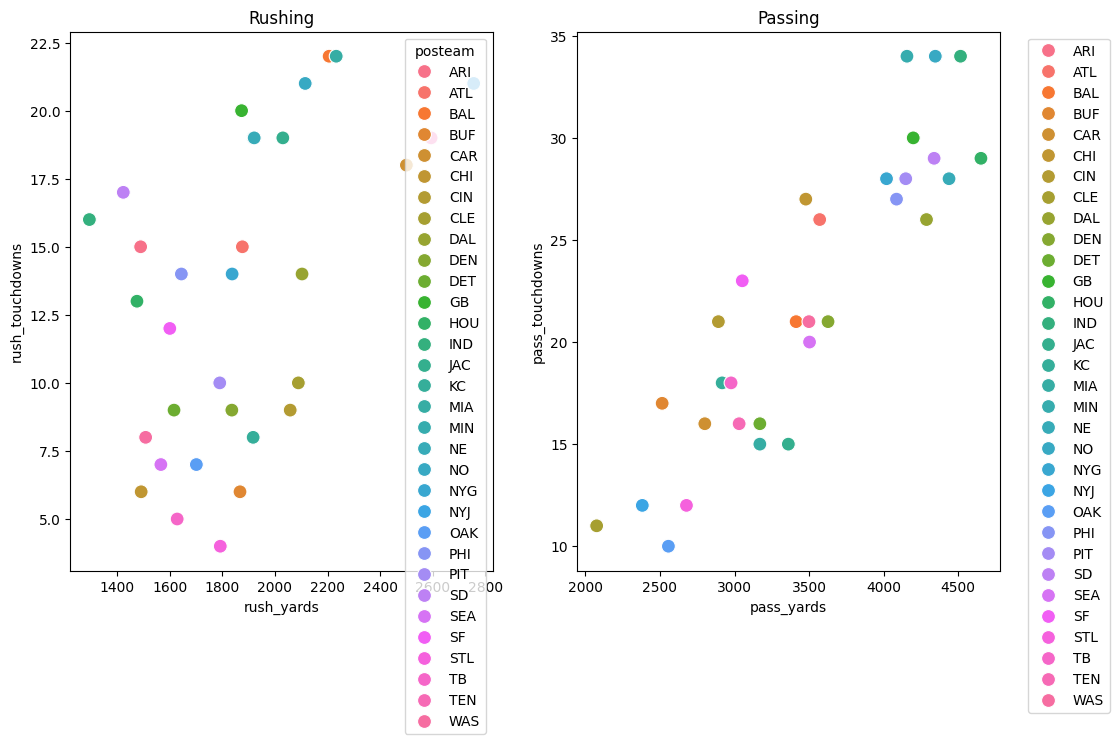

In [7]:
# Correlation between rush_yards and rush_touchdowns compared to correlation between pass_yards and pass_touchdowns
fig, axes = plt.subplots(1,2, figsize = (12, 7))

sns.scatterplot(data = stats, x = 'rush_yards', y = 'rush_touchdowns', ax = axes[0], hue = 'posteam', s=100)

axes[0].set_title('Rushing')

sns.scatterplot(data = stats, x = 'pass_yards', y = "pass_touchdowns", ax = axes[1], hue = 'posteam', s=100)

axes[1].set_title('Passing')

#plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


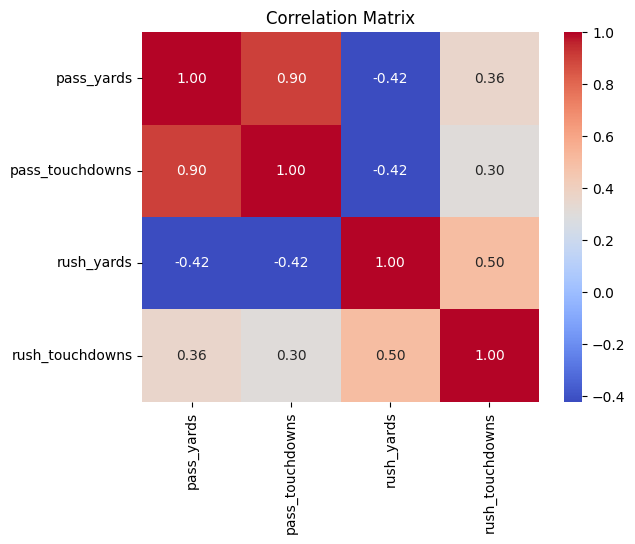

In [8]:
# Heatmap to show correlation of pass_yards/touchdowns, rush_yards/touchdowns

corr = stats[['pass_yards', 'pass_touchdowns', 'rush_yards', 'rush_touchdowns']].corr()

sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f')

plt.title("Correlation Matrix")
plt.show()

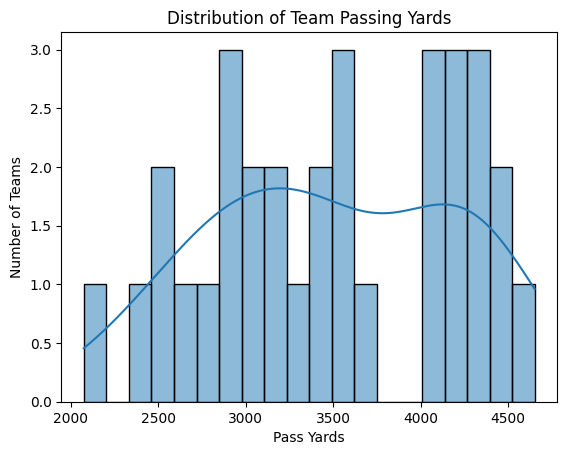

In [9]:
# Histogram of pass yards across the league

sns.histplot(data = stats, x = 'pass_yards', bins = 20, kde = True)

plt.title("Distribution of Team Passing Yards")
plt.xlabel("Pass Yards")
plt.ylabel("Number of Teams")
plt.show()

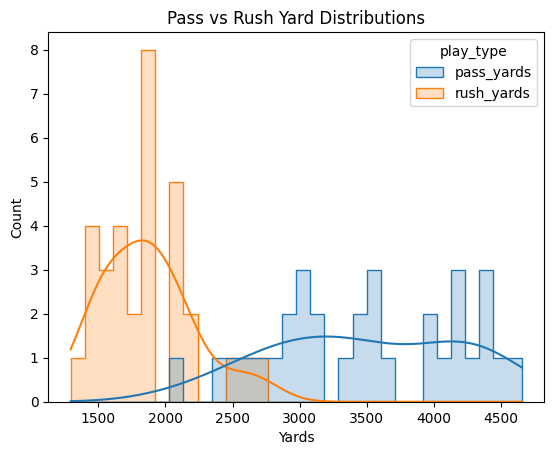

In [10]:
# Histogram with pass yards vs rush yards
yard_stats = stats[['pass_yards', 'rush_yards']].melt(var_name = 'play_type', value_name = 'yards')

sns.histplot(data = yard_stats, x = 'yards', hue = 'play_type', bins = 32, kde = True, element = 'step', stat = 'count')

plt.title("Pass vs Rush Yard Distributions")
plt.xlabel("Yards")
plt.show()

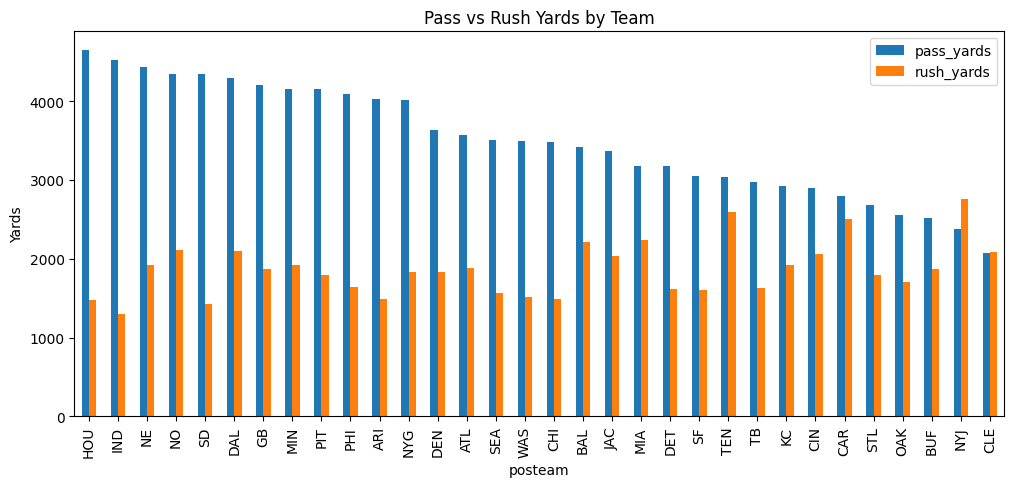

In [11]:
# Example to rank teams by pass yards
team_stats_sorted = stats.sort_values("pass_yards", ascending=False)

team_stats_sorted.set_index("posteam")[["pass_yards", "rush_yards"]].plot(
    kind="bar",
    figsize=(12, 5)
)

plt.title("Pass vs Rush Yards by Team")
plt.ylabel("Yards")
plt.show()


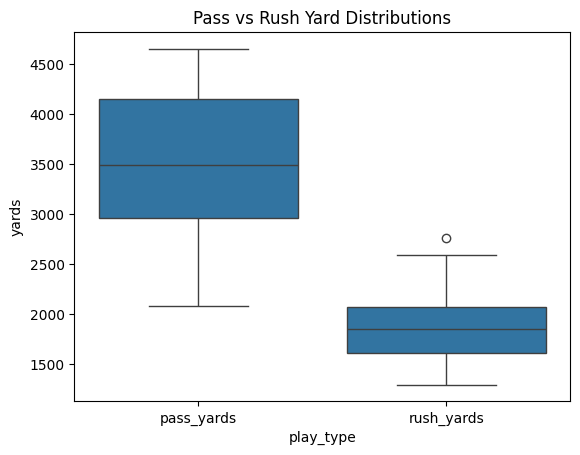

In [12]:
# Example of box plot to show distribution of stats throughout the league
plot_df = stats[["pass_yards", "rush_yards"]].melt(
    var_name="play_type",
    value_name="yards"
)

sns.boxplot(
    data=plot_df,
    x="play_type",
    y="yards"
)

plt.title("Pass vs Rush Yard Distributions")
plt.show()


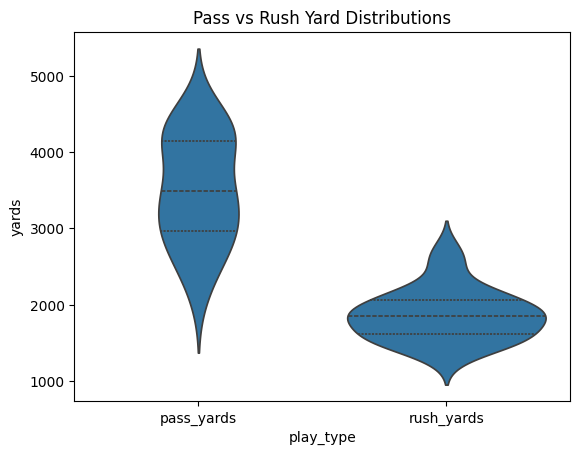

In [13]:
# Example of violin plot as opposed to box plot
sns.violinplot(
    data=plot_df,
    x="play_type",
    y="yards",
    inner="quartile"
)

plt.title("Pass vs Rush Yard Distributions")
plt.show()


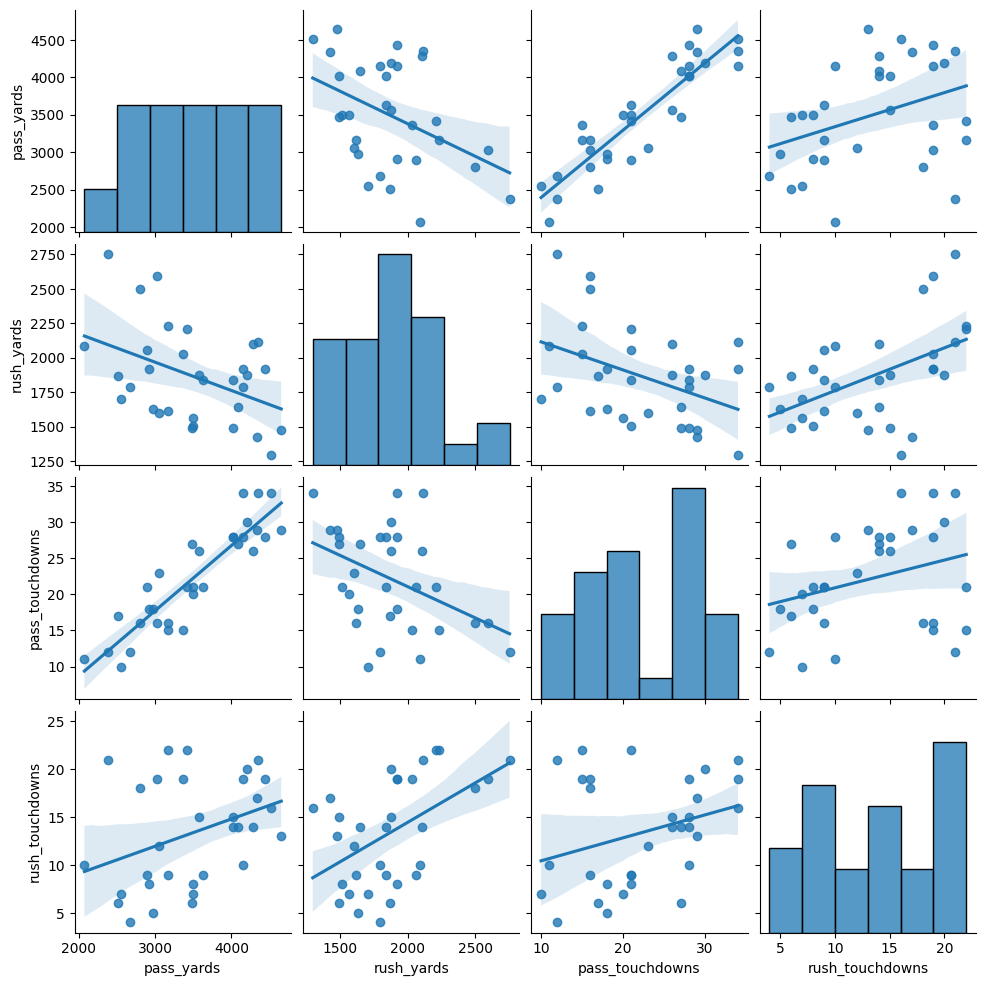

In [14]:
# Example of pair plot to see how all stats relate
sns.pairplot(
    stats[
        ["pass_yards", "rush_yards", "pass_touchdowns", "rush_touchdowns"]
    ],
    kind="reg"
)
